## Assignment 1 
CS 6180: Clustering

Kendall Stauffer  
u0688677

### Problem 1
Implement the K-Center (aka FurthestPoint) algorithm using euclidean distance as the distance function. Using your K-Center implementation, evaluate data1.csv. Preview the document with 3 centers and then try with 4 centers. Next assign each point to its nearest center (using euclidean distance as the distance function) and generate a scatter plot where each cluster is represented by a different color. Also, represent the cluster centers as solid black.

Using this same data set run K-Means using 3 centers and produce similar plots as described previously. Compare and contrast the results with K-Centers, what are the differences you are seeing. Feel free to use an out-of-the-box K-Means (eg. sklearn.cluster.KMeans). Finally produce two cost function plots with # centers along the x-axis and cost of that clustering along the y-axis. Do this for both algorithms (K-Center and K-Means).

### Problem 1 Answer

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs

#importing data for question 1
data1 = pd.read_csv('./Data/data1.csv')

print(data1.head())
print(data1.shape)

   index          x          y  cluster
0      0   7.416767   8.246789      1.0
1      1   2.214508  12.982810      1.0
2      2  10.924226   6.348020      1.0
3      3 -17.435013   6.078512      2.0
4      4 -15.932323  10.871121      2.0
(600, 4)


#### Furthest Point algorithm



In [2]:
def euclidean_distance(initial_cluster, coordinates):
    """   
    :param initial_cluster: First chosen cluster
    :param coordinates: points you want to cluster
    :return:  euclidean distances
    """
    # calculating euclidean distance
    e_dist = ((initial_cluster - coordinates)**2).sum(axis=1)
    return e_dist

def calculate_centers(coordinates, K):
    """
    :param coordinates: points you want to cluster
    :param K: number of clusters you desire
    :return: dictionary that contains both distances and cluster centers
    """
    # making array to store cluster centers in
    centers = np.empty((K, coordinates.shape[1]))
    
    # selecting first cluster center at random
    centers[0] = coordinates[np.random.randint(coordinates.shape[0])]
    # print(centers[0].shape)
    # calculating distances from first cluster center
    e_distances = euclidean_distance(centers[0], coordinates)
    temp_dist = np.append(coordinates, e_distances.reshape(coordinates.shape[0], 1), axis=1)

    for i in range(1, K):
        # starts at 1 because the initial cluster center is in 0
        # pulling maximum distance and assigning as a center
        centers[i] = coordinates[np.argmax(e_distances)]
        # pulling the closest distances to the cluster centers
        e_distances = np.minimum(e_distances, euclidean_distance(centers[i], coordinates))
        temp_dist = np.append(temp_dist, e_distances.reshape(coordinates.shape[0],1), axis=1)
    
    # calculating clusters
    temp_dist = pd.DataFrame(temp_dist)
    for index, row in temp_dist.iterrows():
        # pulling the index of the minimum distance
        temp_dist.loc[index, 'new_cluster'] = temp_dist.iloc[index, 2:].idxmin(axis=0)
    
    # adjusting the cluster numbering
    temp_dist['new_cluster'] = temp_dist['new_cluster'] - 2
           
    # storing cluster centers and distances in dictionary
    temp = {'cluster_centers': centers,
            'e_distances': temp_dist}
    return temp


##### 3 clusters

In [3]:
# calculating clusters
cluster_data = calculate_centers(data1[['x', 'y']].values, K=3)
# Extracting centers data
centers = pd.DataFrame(cluster_data['cluster_centers'])
# Extracting rest of the data
data = cluster_data['e_distances']

In [4]:
data.head()

0          1           2           3           4  new_cluster
0   7.416767   8.246789   28.255436   28.255436   28.255436          0.0
1   2.214508  12.982810   90.549353   90.549353   90.549353          0.0
2  10.924226   6.348020   47.143311   47.143311   47.143311          0.0
3 -17.435013   6.078512  489.319184  489.319184  489.319184          0.0
4 -15.932323  10.871121  470.638938  470.638938  470.638938          0.0

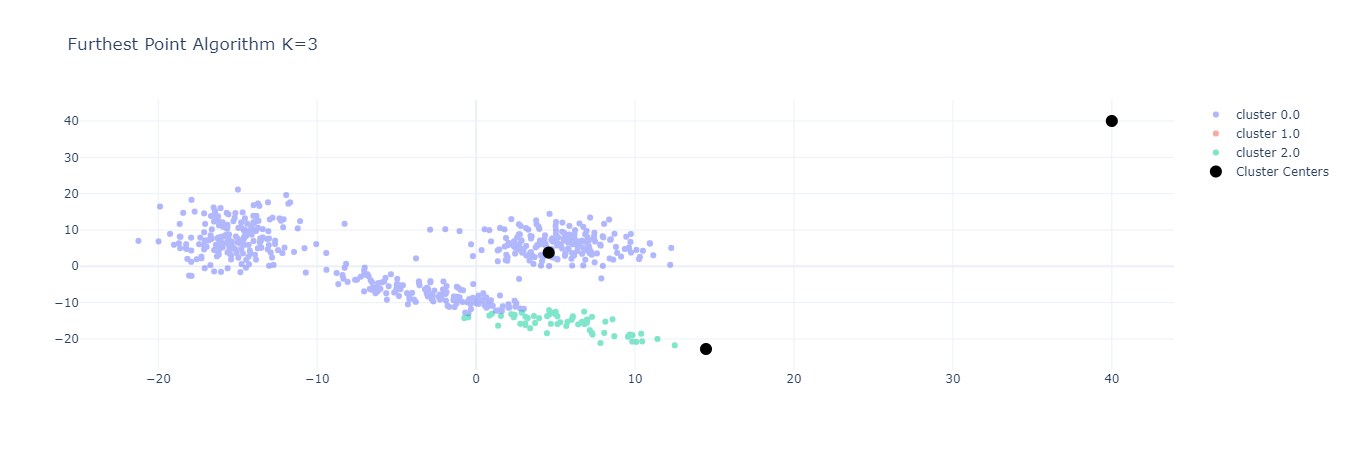

In [5]:
fig = go.Figure()
for cluster in data.new_cluster.unique():
    temp = data[data.new_cluster == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp[0], y=temp[1], opacity=0.5, mode='markers', name=f'cluster {cluster}'))
fig.add_trace(go.Scatter(x=centers[0], y=centers[1], mode='markers', 
                         marker=dict(size=12, color='black'), name='Cluster Centers'))
fig.update_layout(template='plotly_white', title='Furthest Point Algorithm K=3')
plotly.offline.iplot(fig, filename='temp.html')

##### 4 clusters

In [6]:
# calculating clusters
cluster_data = calculate_centers(data1[['x', 'y']].values, K=4)

# Extracting centers data
centers = pd.DataFrame(cluster_data['cluster_centers'])
# Extracting rest of the data
data = cluster_data['e_distances']

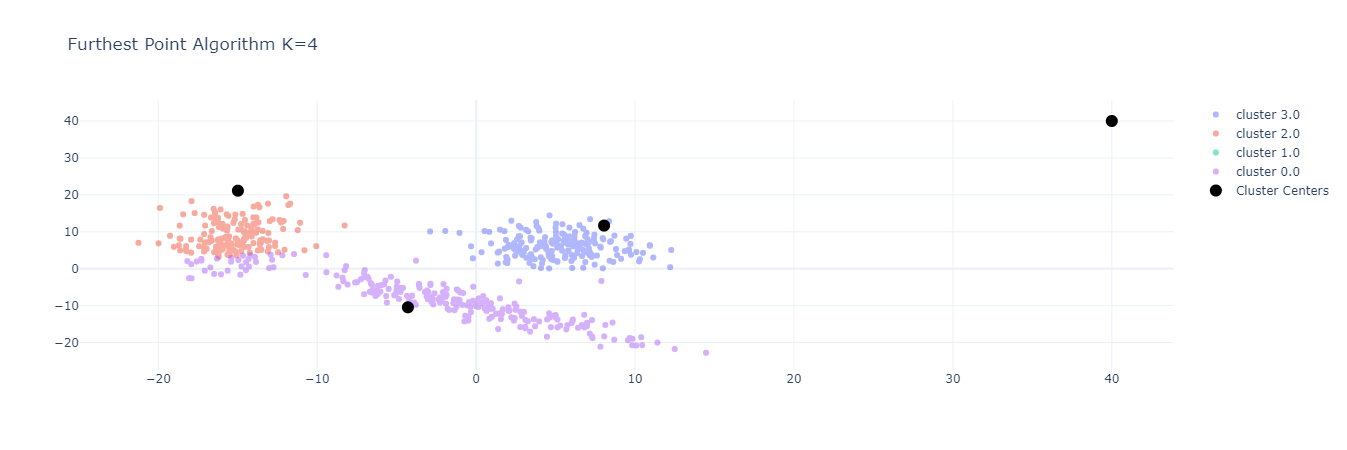

In [7]:
fig = go.Figure()
for cluster in data.new_cluster.unique():
    temp = data[data.new_cluster == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp[0], y=temp[1], opacity=0.5, mode='markers', name=f'cluster {cluster}'))
fig.add_trace(go.Scatter(x=centers[0], y=centers[1], mode='markers', 
                         marker=dict(size=12, color='black'), name='Cluster Centers'))
fig.update_layout(template='plotly_white', title='Furthest Point Algorithm K=4')
plotly.offline.iplot(fig, filename='temp.html')

#### Kmeans algorithm
##### 3 Clusters



In [8]:
# Running Kmeans at k=3
kmeans = KMeans(n_clusters=3, random_state=123).fit(data[[0, 1]].values)
data['kmeans_clusters'] = kmeans.labels_
centers = kmeans.cluster_centers_

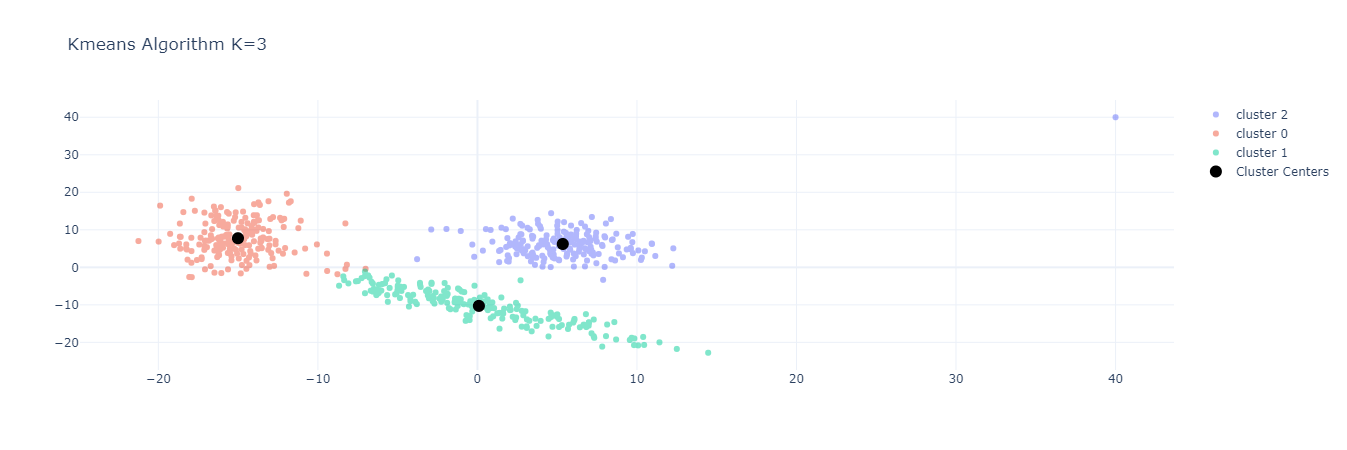

In [9]:
fig = go.Figure()
for cluster in data.kmeans_clusters.unique():
    temp = data[data.kmeans_clusters == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp[0], y=temp[1], opacity=0.5, mode='markers', name=f'cluster {cluster}'))
fig.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1], mode='markers', 
                         marker=dict(size=12, color='black'), name='Cluster Centers'))
fig.update_layout(template='plotly_white', title='Kmeans Algorithm K=3')
plotly.offline.iplot(fig, filename='temp.html')

4 Clusters



In [10]:
# Running Kmeans at K=4
kmeans = KMeans(n_clusters=4, random_state=123).fit(data[[0, 1]].values)
data['kmeans_clusters'] = kmeans.labels_
centers = kmeans.cluster_centers_

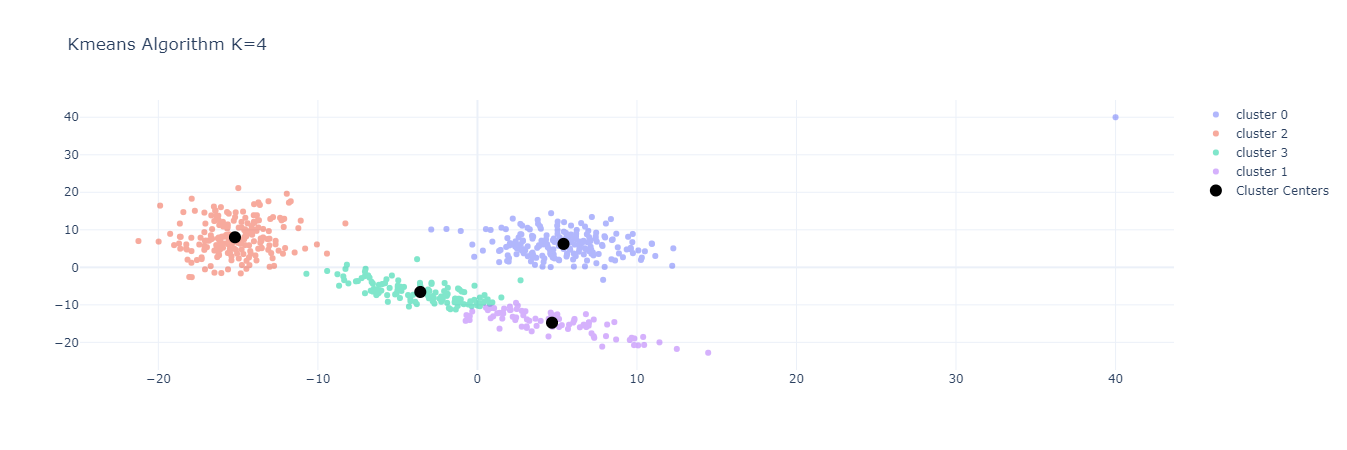

In [11]:
fig = go.Figure()
for cluster in data.kmeans_clusters.unique():
    temp = data[data.kmeans_clusters == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp[0], y=temp[1], opacity=0.5, mode='markers', name=f'cluster {cluster}'))
fig.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1], mode='markers', 
                         marker=dict(size=12, color='black'), name='Cluster Centers'))
fig.update_layout(template='plotly_white', title='Kmeans Algorithm K=4')
plotly.offline.iplot(fig, filename='temp.html')


The biggest visual difference between the furthest point algorithm and kmeans is the cluster center placement.
The furthest point algorithm continuously gets distracted by the outlier point found at (40, 40). It usually places its
own cluster center there then struggles to assign the rest of the points. This is apprent when k=3. The clustering at k=4 is better because it classifies the three main clusters independent of the point located at (40, 40). On the other hand Kmeans does a great job
at at assigning its centroids to the mean value of the nearby points, thus limiting the influence of outliers. As seen at k=3, kmeans does  agood job at finding 3 clusters without placing a cluster center at (40, 40). In addition, at k=4 it still provides reasonable clusters without being influenced by point (40, 40).

In [12]:
cost = []
K = range(1, 5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data[[0, 1]].values)
    cost.append(km.inertia_)


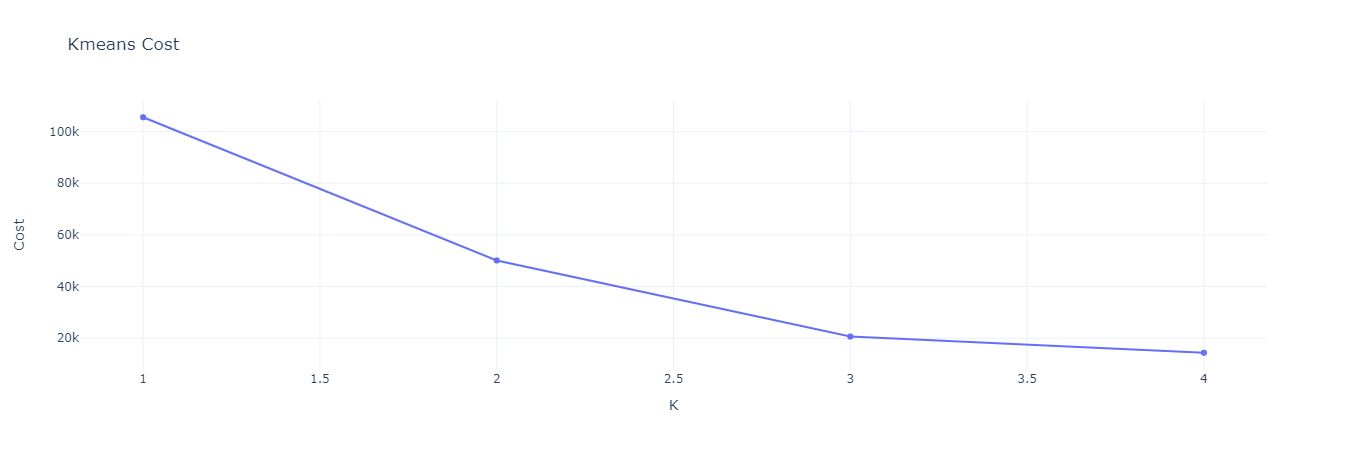

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(K), y=cost, mode='markers+lines', name='Cost'))
fig.update_layout(template='plotly_white', title='Kmeans Cost', xaxis_title='K', yaxis_title='Cost')
plotly.offline.iplot(fig, filename='temp.html')

In [14]:
costs = data.sum(axis=0)[2:6]
print(costs)

2    190235.097659
3    185727.268115
4    121148.592012
5     59769.834890
dtype: float64


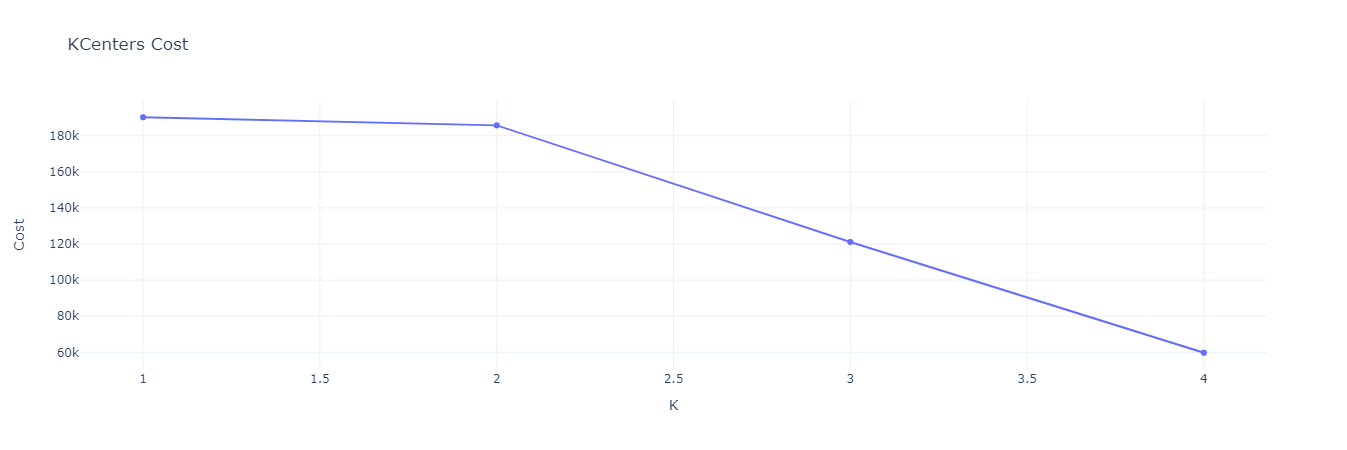

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(K), y=costs, mode='markers+lines', name='Cost'))
fig.update_layout(template='plotly_white', title='KCenters Cost', xaxis_title='K', yaxis_title='Cost')
plotly.offline.iplot(fig, filename='temp.html')

The maximum cost of kcenters at k=1 appears to be higher than that of kmeans at k=1. The slope of the line for Kcenters appears to be less steep from k=1 to k=2. Indicating that finding the cost of the furthest point from the centroid is high. At k=3 & k=4 the slope of the line appears to be more similar to that of kmeans, meaning it rapidly decreases in cost as more centers are to be discovered. The biggest diffrences is that the maximum and minimum cost values of kcenters are much greater than that of kmeans. 


### Problem 2 
Generate your own data sets for running K-Means. Explore how changing the data generating 
distribution (mean, variance etc) causes K-Means to start to “break”. Again, feel free to use an 
out-of-the-box K-Means (eg. sklearn.cluster.KMeans).


### Problem 2 Answer:


In [131]:
# Generating random blobs to test kmeans.
x1, y1 = make_blobs(n_samples=np.random.randint(50, 600), centers=6, center_box=(np.random.randint(-10, 10), np.random.randint(-10, 10)), 
                    cluster_std=np.random.randint(950, 1000), n_features=2)

x2, y2 = make_blobs(n_samples=np.random.randint(50, 600), centers=np.random.randint(2, 10), center_box=(1, 5), 
                    cluster_std=np.random.randint(1, 1000), n_features=2)
x3, y3 = make_blobs(n_samples=np.random.randint(50, 600), centers=np.random.randint(2, 10), center_box=(np.random.randint(100, 300), np.random.randint(1, 5)), 
                    cluster_std=np.random.randint(1, 1000), n_features=2)
x4, y4 = make_blobs(n_samples=np.random.randint(50, 600), centers=np.random.randint(2, 10), center_box=(np.random.randint(-50, 50), np.random.randint(-75, 75)), 
                    cluster_std=np.random.randint(1, 10), n_features=2)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)



(182, 2)
(92, 2)
(488, 2)
(568, 2)


x1
x2
x3
x4


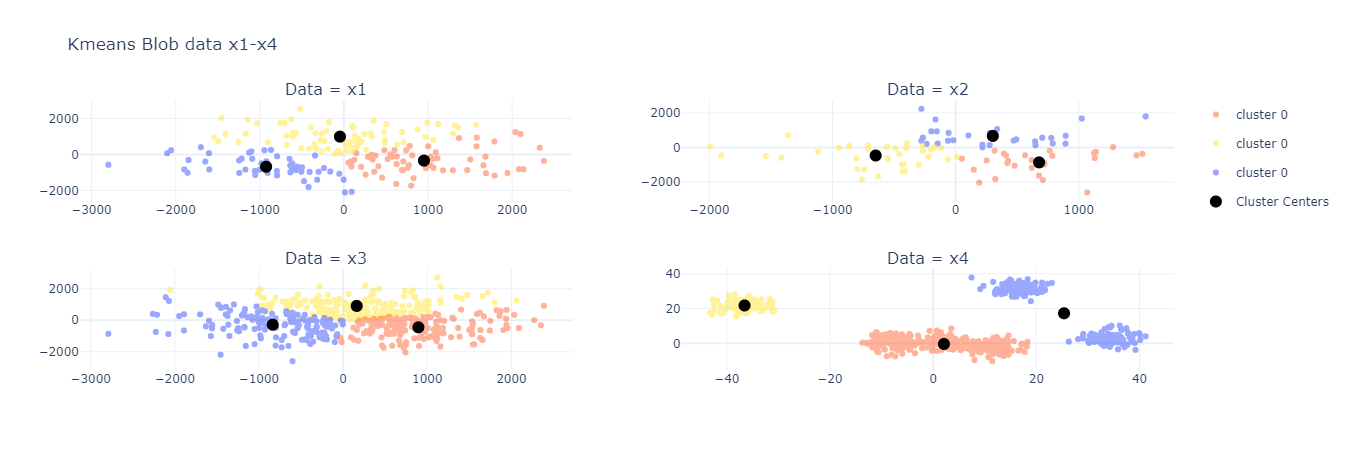

In [132]:
fig_blob = make_subplots(rows=2, cols=2,
                    subplot_titles=['Data = x1', 'Data = x2', 'Data = x3', 'Data = x4'])

cmap ={ 0: '#FF6433', 1: '#FFE633', 2: '#334EFF', 3: '#DA2569', 4: '#25DAC3'}

list_of_dfs = {'x1': {'data': x1, 'loc': [1, 1]},
               'x2': {'data': x2, 'loc': [1, 2]}, 
               'x3': {'data': x3, 'loc': [2, 1]}, 
               'x4': {'data': x4, 'loc': [2, 2]}}

centers_legend = []
legend = []
for key in list_of_dfs.keys():
    print(key)
    temp_k = pd.DataFrame(list_of_dfs[key]['data'])
    #print(temp_k.shape)
    kmeans = KMeans(n_clusters=3, random_state=123).fit(temp_k)
    temp_k['clusters'] = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    if len(centers_legend) == 0:
        cc_legend = True
        centers_legend.append(key)
    else:
        cc_legend = False
        
    for z in temp_k.clusters.unique():
        #print(z)
        if z not in legend:
            legend.append(z)
            show_legend = True
        else:
            show_legend = False

        temp = temp_k[temp_k['clusters'] == z].reset_index(drop=True)
        #print(temp)
        fig_blob.add_trace(go.Scatter(x=temp[0], y=temp[1], opacity=0.5, 
                                 mode='markers', name=f'cluster {cluster}', legendgroup=f'cluster {z}', marker=dict(color=cmap[z]),  showlegend=show_legend), 
                      row=list_of_dfs[key]['loc'][0], col=list_of_dfs[key]['loc'][1])
    fig_blob.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1], mode='markers', 
                             marker=dict(size=12, color='black'), name='Cluster Centers', legendgroup='Cluster Centers', showlegend=cc_legend), 
                      row=list_of_dfs[key]['loc'][0], col=list_of_dfs[key]['loc'][1])

fig_blob.update_layout(template='plotly_white', title=f'Kmeans Blob data x1-x4')
plotly.offline.iplot(fig_blob, filename='temp_blob.html')

In [134]:
cost = []
K = range(1, 4)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(list_of_dfs['x1']['data'])
    cost.append(km.inertia_)


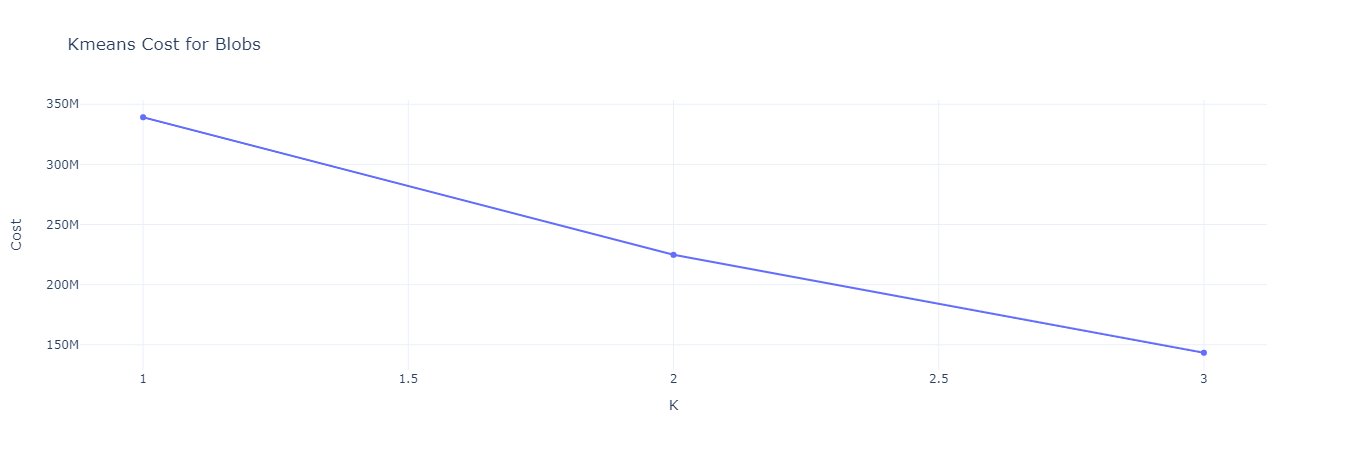

In [135]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(K), y=cost, mode='markers+lines', name='Cost'))
fig.update_layout(template='plotly_white', title='Kmeans Cost for Blobs', xaxis_title='K', yaxis_title='Cost')
plotly.offline.iplot(fig, filename='temp.html')


I ran several different iterations os the make_blobs functions to see if I could break it (see first plot in this section). Kmeans seems to do a good job 
at classifying the blob shaped data. It begins to struggle when the standard deviations, and means of the clusters are increased. An example is also the dataset that follows. Kmeans performs terribly on spiral and squiggly lined datasets because it tries to fit the mean, but due to those data arrangements the mean of hte points may not be representative of the data.




 
### Problem 3
Download data2.csv and preview the document and run K-Means. Experiment with different values for k and visualize and discuss the results


### Problem 3 Answer:

In [136]:
data = pd.read_csv('./Data/data2.csv')
data.head()

index         x         y  cluster
0      0  4.474084  1.172591      NaN
1      1 -1.737236 -0.926977      NaN
2      2  4.118955  2.475785      NaN
3      3  1.105185  0.640976      NaN
4      4  4.821377  0.579391      NaN

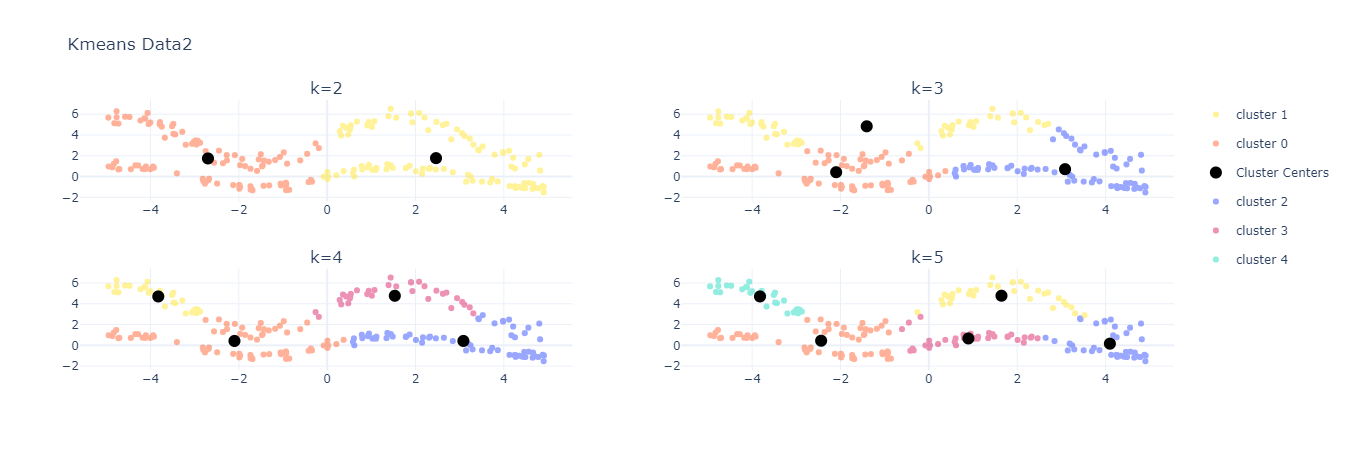

In [137]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['k=2', 'k=3', 'k=4', 'k=5'])

cmap ={ 0: '#FF6433', 1: '#FFE633', 2: '#334EFF', 3: '#DA2569', 4: '#25DAC3'}

plot_loc = {2:[1, 1], 
            3: [1, 2],
            4: [2, 1],
            5: [2, 2]}

K=[2, 3, 4, 5]

legend = []
for i, k in enumerate(K):
    kmeans = KMeans(n_clusters=k, random_state=123).fit(data[['x', 'y']].values)
    data[f'clusters_{k}'] = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i == 0:
        cc_legend = True
    else:
        cc_legend = False
        
    for cluster in data[f'clusters_{k}'].unique():
        if cluster not in legend:
            legend.append(cluster)
            show_legend = True
        else:
            show_legend = False

        temp = data[data[f'clusters_{k}'] == cluster].reset_index(drop=True)
        fig.add_trace(go.Scatter(x=temp['x'], y=temp['y'], opacity=0.5, 
                                 mode='markers', name=f'cluster {cluster}', legendgroup=f'cluster {cluster}', marker=dict(color=cmap[cluster]),  showlegend=show_legend), 
                      row=plot_loc[k][0], col=plot_loc[k][1])
    fig.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1], mode='markers', 
                             marker=dict(size=12, color='black'), name='Cluster Centers', legendgroup='Cluster Centers', showlegend=cc_legend), 
                      row=plot_loc[k][0], col=plot_loc[k][1])

fig.update_layout(template='plotly_white', title=f'Kmeans Data2')
plotly.offline.iplot(fig, filename='temp.html')
    

It's interesting at how poorly kmeans does at clustering non blob like data. In this dataset the points as seen above are easily described as squiggly lines. It has a hard time selecting just the parts of the two sets of points. Because of how it works it continues to combine points from what could be two different sets of clusters. A good example of this is when k=2. Instead of clustering by the lines it segments the clusters in half down the xaxis 0. This occurs because kmeans is trying to move its centers to the location that is the average of the points. This is also why in many of the above plots the centroid lay in between the two squggly lines. As k is increased there is no real performance enhancement. Kmeans tries to fit the data but with no success.


### Problem 4
Implement the HAC algorithm based on the discussion in class (see posted notes for pseudo-code). Apply this algorithm to data2.csv. Preview the document experimenting with different values for k and visualize and discuss results.


### Problem 4 Answer

In [138]:
data =  data[['x', 'y']].copy()
print(data.head())
print(data.shape)

          x         y
0  4.474084  1.172591
1 -1.737236 -0.926977
2  4.118955  2.475785
3  1.105185  0.640976
4  4.821377  0.579391
(200, 2)


In [139]:
def hac_single_link(original_clusters, cluster_num):
    """
    This functio performs Hierarchical Agglomerative Clustering (HAC) single link.
    This is a greedy appoach to HAC, all points are assumed to be a cluster then and greedly merged together
    based off the euclidean distances.
    
    :param original_clusters: data points that have been processed by the cluster_initialization function below.
    :param cluster_num: Number of cluster of interest.
    :return: returns a list that contains k number of sublists. The index of each list is the respective cluster that
    the points belong to.
    """
    import math
    from scipy.spatial import distance as dist
    while len(original_clusters) is not cluster_num:
    #      initializing to infinity because it will not come up as a minimum when distance comparisons are done.
        min_dist = math.inf
        cluster1 = math.inf
        cluster2 = math.inf
        #         interating through clusters
        for clust1_id, clust1 in enumerate(original_clusters):
        #                 iterating through each x, y coordinant
            for coord_loc, coord1 in enumerate(clust1):
            #                  Comparing other clusters to the first cluster
                for clust2_id, clust2 in enumerate(original_clusters[(clust1_id + 1):]):
                #                     interating through x, y for the second cluster
                    for coord_loc2, coord2, in enumerate(clust2):
                    #                             checking to see if the euclidiean distance is than the minimum distance
                        if dist.euclidean(coord1, coord2) < min_dist:
                        # calculte the euclidean distance and update the minimum distance          
                            min_dist = dist.euclidean(coord1, coord2)
                            # storing first cluster
                            cluster1 = clust1_id
                            #print(f"c1 {cluster1}")
                            # storing second cluster
                            cluster2 = clust2_id + clust1_id + 1
                            #print(f"c1 {cluster2}")
        #print(f'cluster 1 {cluster1}')
        #print(f'cluster 2 {cluster2}')
        original_clusters[cluster1].extend(original_clusters[cluster2])
        #print(original_clusters)
        original_clusters.pop(cluster2)
        #print(original_clusters)
    return original_clusters        

In [140]:
def cluster_initialization(data, num_cluster):
    """
    Prepares the data for hac_single_link clustering.
    
    :param data: dataframe or array that contains 2 columns.
    :param num_clusters: The number of desired clusters.
    :return: hac_single_link(original_clusters, num_cluster): Runs the hac_single_link function.
    """
#     assigning every point to its own cluster
    original_clusters = data.iloc[:, 0:2].values.tolist()
    original_clusters = [[cluster] for cluster in original_clusters]
    return hac_single_link(original_clusters, num_cluster)


In [141]:
# Unpacking the hierarchical clustering data
def unpack_hclust(h_clust_data):
    """
    Unpacks the HAC single link data and stores it into a pandas dataframe.
    
    :param h_clust_data: The object returned from the hac_single_link function.
    :return: HAC single link data in a pandas dataframe.
    """
    import pandas as pd
    for index, cluster in enumerate(h_clust_data):
        if index == 0: 
            df_h_data = pd.DataFrame(cluster)
            df_h_data['cluster'] = index
        else:
            temp = pd.DataFrame(cluster)
            temp['cluster'] = index
            df_h_data = df_h_data.append(temp, ignore_index=True)
    return df_h_data


In [142]:
%%timeit
h_data = cluster_initialization(data, 4)
df_h_data = unpack_hclust(h_data)
print(df_h_data.shape)
print(df_h_data.head())

(200, 3)
          0         1  cluster
0  4.474084  1.172591        0
1  4.250944  0.775060        0
2  4.171119  0.966900        0
3  4.118955  2.475785        0
4  3.983311  2.285059        0
(200, 3)
          0         1  cluster
0  4.474084  1.172591        0
1  4.250944  0.775060        0
2  4.171119  0.966900        0
3  4.118955  2.475785        0
4  3.983311  2.285059        0
(200, 3)
          0         1  cluster
0  4.474084  1.172591        0
1  4.250944  0.775060        0
2  4.171119  0.966900        0
3  4.118955  2.475785        0
4  3.983311  2.285059        0
(200, 3)
          0         1  cluster
0  4.474084  1.172591        0
1  4.250944  0.775060        0
2  4.171119  0.966900        0
3  4.118955  2.475785        0
4  3.983311  2.285059        0
(200, 3)
          0         1  cluster
0  4.474084  1.172591        0
1  4.250944  0.775060        0
2  4.171119  0.966900        0
3  4.118955  2.475785        0
4  3.983311  2.285059        0
(200, 3)
          0     

In [ ]:
%%timeit
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['k=2', 'k=3', 'k=4', 'k=5'])

cmap ={ 0: '#FF6433', 1: '#FFE633', 2: '#334EFF', 3: '#DA2569', 4: '#25DAC3'}

plot_loc = {2:[1, 1], 
            3: [1, 2],
            4: [2, 1],
            5: [2, 2]}

K=[2, 3, 4, 5]

legend = []
for i, k in enumerate(K):
    temp_h_data = cluster_initialization(data, k)
    temp_data = unpack_hclust(temp_h_data)
        
    for cluster in temp_data['cluster'].unique():
        if cluster not in legend:
            legend.append(cluster)
            show_legend = True
        else:
            show_legend = False

        temp = temp_data[temp_data['cluster'] == cluster].reset_index(drop=True)
        fig.add_trace(go.Scatter(x=temp[0], y=temp[1], opacity=0.5, 
                                 mode='markers', name=f'cluster {cluster}', legendgroup=f'cluster {cluster}', marker=dict(color=cmap[cluster]),  showlegend=show_legend), 
                      row=plot_loc[k][0], col=plot_loc[k][1])

fig.update_layout(template='plotly_white', title=f'HAC Single-Link')
plotly.offline.iplot(fig, filename='temp.html')

#### Validation

In [ ]:
%%timeit
temp_data = data

fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['k=2', 'k=3', 'k=4', 'k=5'])

cmap ={ 0: '#FF6433', 1: '#FFE633', 2: '#334EFF', 3: '#DA2569', 4: '#25DAC3'}

plot_loc = {2:[1, 1], 
            3: [1, 2],
            4: [2, 1],
            5: [2, 2]}

K=[2, 3, 4, 5]

legend = []
for i, k in enumerate(K):
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    hac.fit_predict(temp_data)
    temp_data['cluster'] = hac.labels_

    for cluster in temp_data['cluster'].unique():
        if cluster not in legend:
            legend.append(cluster)
            show_legend = True
        else:
            show_legend = False

        temp = temp_data[temp_data['cluster'] == cluster].reset_index(drop=True)
        fig.add_trace(go.Scatter(x=temp['x'], y=temp['y'], opacity=0.5, 
                                 mode='markers', name=f'cluster {cluster}', legendgroup=f'cluster {cluster}', marker=dict(color=cmap[cluster]),  showlegend=show_legend), 
                      row=plot_loc[k][0], col=plot_loc[k][1])

fig.update_layout(template='plotly_white', title=f'HAC Single-Link Sklearn')
plotly.offline.iplot(fig, filename='temp.html')